In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import isnan

sns.set()

In [44]:
output_file = 'results/Ozone/results_final'

total_metrics = pd.read_csv(f'{output_file}.csv')

#total_metrics = pd.concat((total_metrics, pd.read_csv(f'{output_file_2}.csv')))
total_metrics["n_features"] = total_metrics.selected_features.apply(eval).apply(len)
#total_metrics["selection_params_residual"] = total_metrics.selection_params_residual.fillna(False)

In [45]:
total_metrics['model_name'] = total_metrics['model_name'].replace({'decisiontree': 'DT'})
total_metrics['selection_name'] = total_metrics['selection_name'].replace({'NoSelection': 'NS', 'TimeSelectionLayer': 'TSL'})

#total_metrics = total_metrics[total_metrics.selection_params_residual==False].reset_index(drop=True)

total_metrics.loc[total_metrics.selection_name=='TSL', 'model_name'] = 'TSL'
total_metrics.loc[total_metrics.selection_name=='TimeSelectionLayerConstant', 'model_name'] = 'TSL*'
#total_metrics.loc[(total_metrics.selection_name=='TSL') & (total_metrics.selection_params_residual), 'model_name'] = 'TSLRes'
total_metrics['model_name'] = total_metrics['model_name'].replace({'dense': 'FF', 'lasso': 'L1'})
total_metrics['dataset'] = total_metrics['dataset'].apply(lambda x: x.capitalize()).replace({'Rondadelvalle': 'Ronda del valle'})

In [ ]:
model_params = [col for col in total_metrics.columns if 'model_params' in col or 'selection_params' in col]
grouped = total_metrics.groupby(['dataset', 'selection_name', 'model_name', *model_params], dropna=False).mean()
best_index = grouped.loc[grouped.groupby(['dataset', 'selection_name', 'model_name', 'selection_params_residual'], dropna=False).root_mean_squared_error_valid.idxmin()].index

total_metrics_indexed = total_metrics.set_index(['dataset', 'selection_name', 'model_name',*model_params])

best_by_year = total_metrics_indexed.loc[best_index, ['root_mean_squared_error', 'mean_absolute_error', 'dataset_params_test_year']].reset_index()

best_by_year[best_by_year.dataset_params_test_year>2005].groupby(['dataset', 'model_name'], dropna=False).mean().reset_index().pivot(index = 'dataset', columns='model_name', values='root_mean_squared_error')#.to_latex()

<Figure size 2000x2000 with 0 Axes>

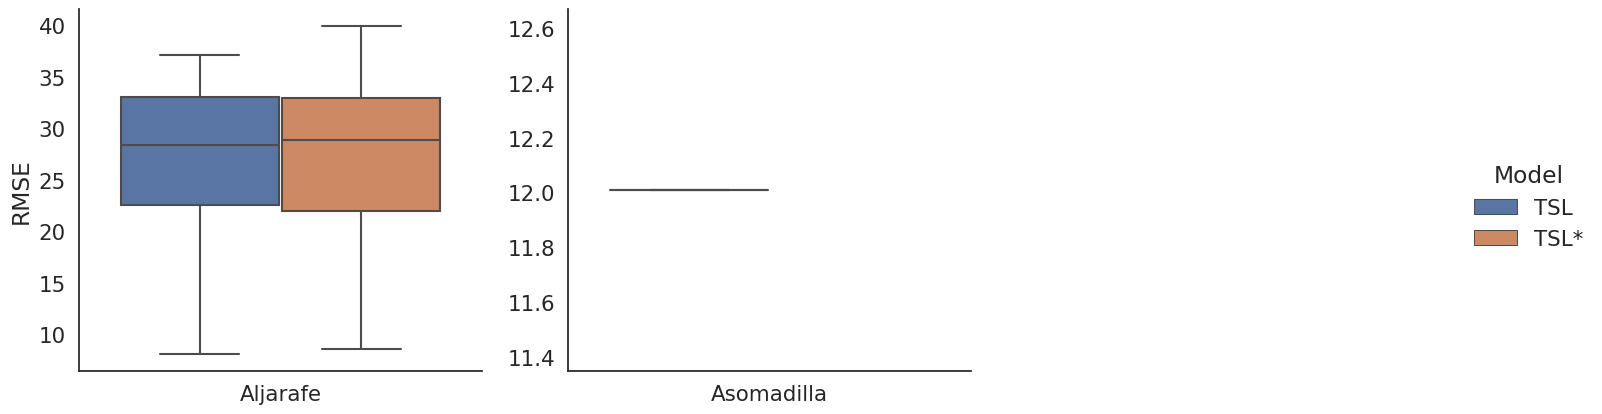

In [47]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))
#total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)
total_metrics = total_metrics.rename({'model_name': 'Model', 'root_mean_squared_error': 'RMSE', 'n_features': '# Features'}, axis=1)
g = sns.catplot(data=total_metrics, kind='box', x='dataset', y="RMSE", col='dataset', hue='Model', sharex=False, sharey=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.savefig('figures/boxplot_RMSE.png')
plt.show()

<Figure size 2000x2000 with 0 Axes>

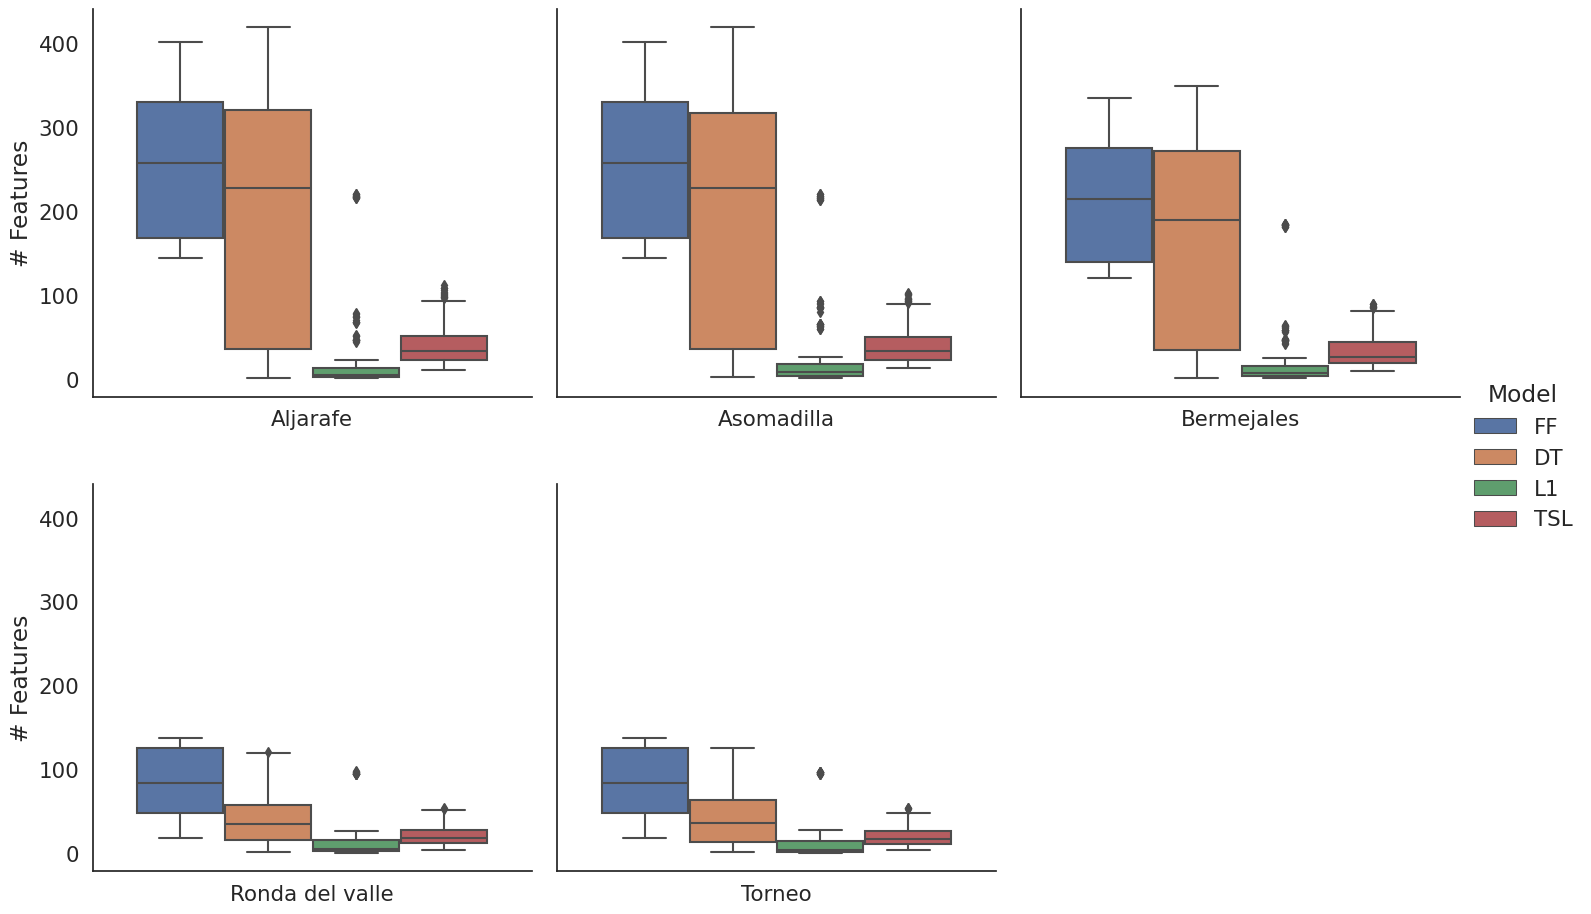

In [326]:
sns.set(font_scale=1.4, style='white')
plt.figure(figsize=(20,20))
total_metrics.loc[:, 'selection_params_residual'] = total_metrics.loc[:, 'selection_params_residual'].fillna(False)

g = sns.catplot(data=total_metrics[(total_metrics.Model!='TSLRes') & (total_metrics.dataset_params_test_year>2005)], kind='box', x='dataset', y="# Features", col='dataset', hue='Model', sharex=False, col_wrap=3, legend=True)#.set_yscale("log")
g.set(xlabel=None)
g.set_titles(template='')
plt.savefig('figures/boxplot_Features.png')
plt.show()
plt.show()

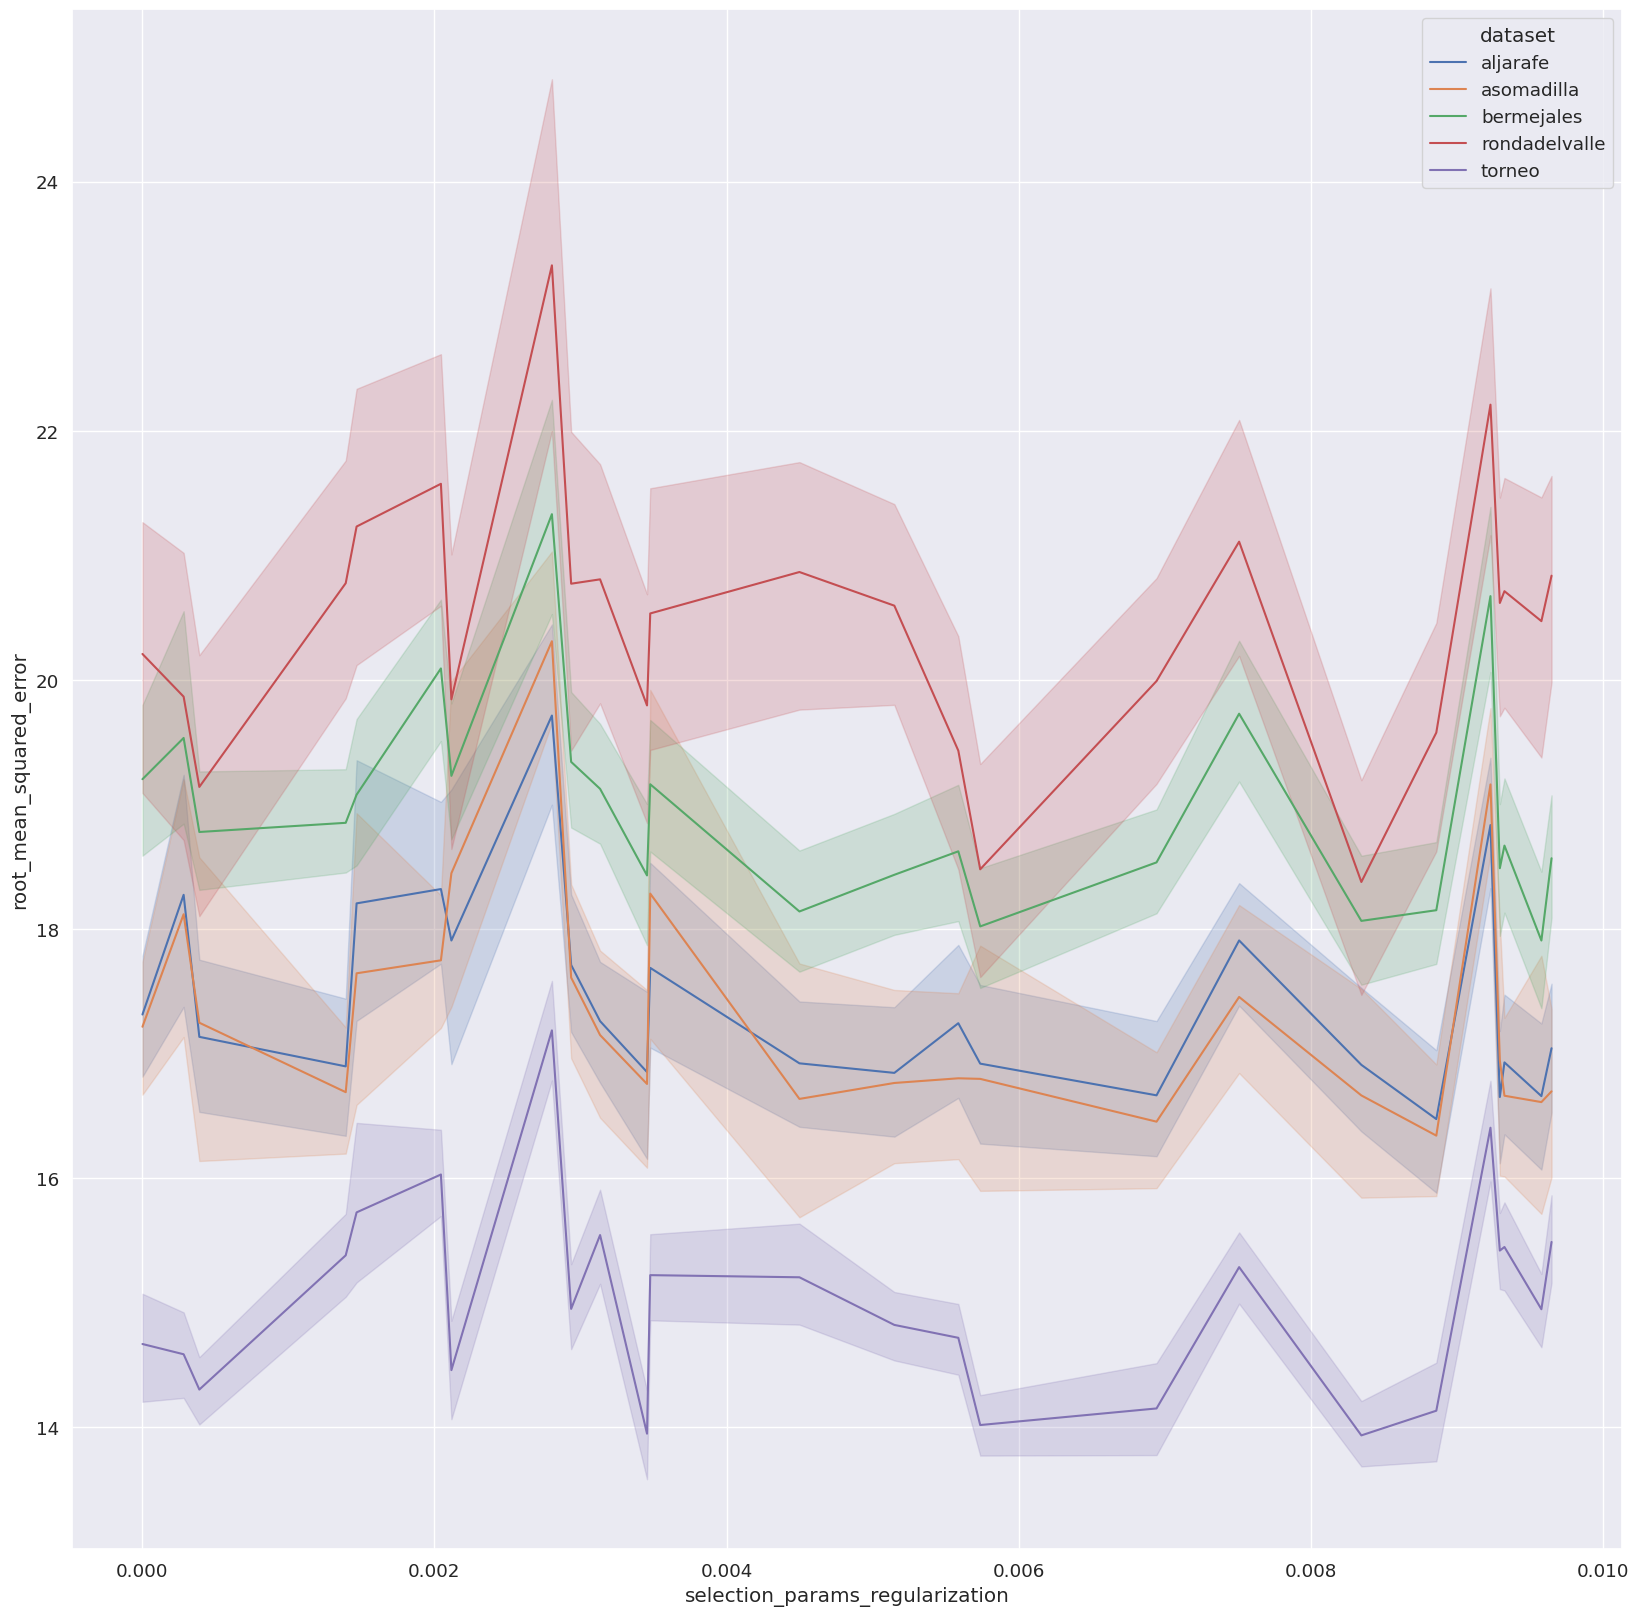

In [220]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))

#g = sns.FacetGrid(df, col="dataset", hue="Condition", col_wrap=5)
sns.lineplot(data=total_metrics[total_metrics.model_name=='TSL'], x="selection_params_regularization",y="root_mean_squared_error", hue="dataset")
plt.show()

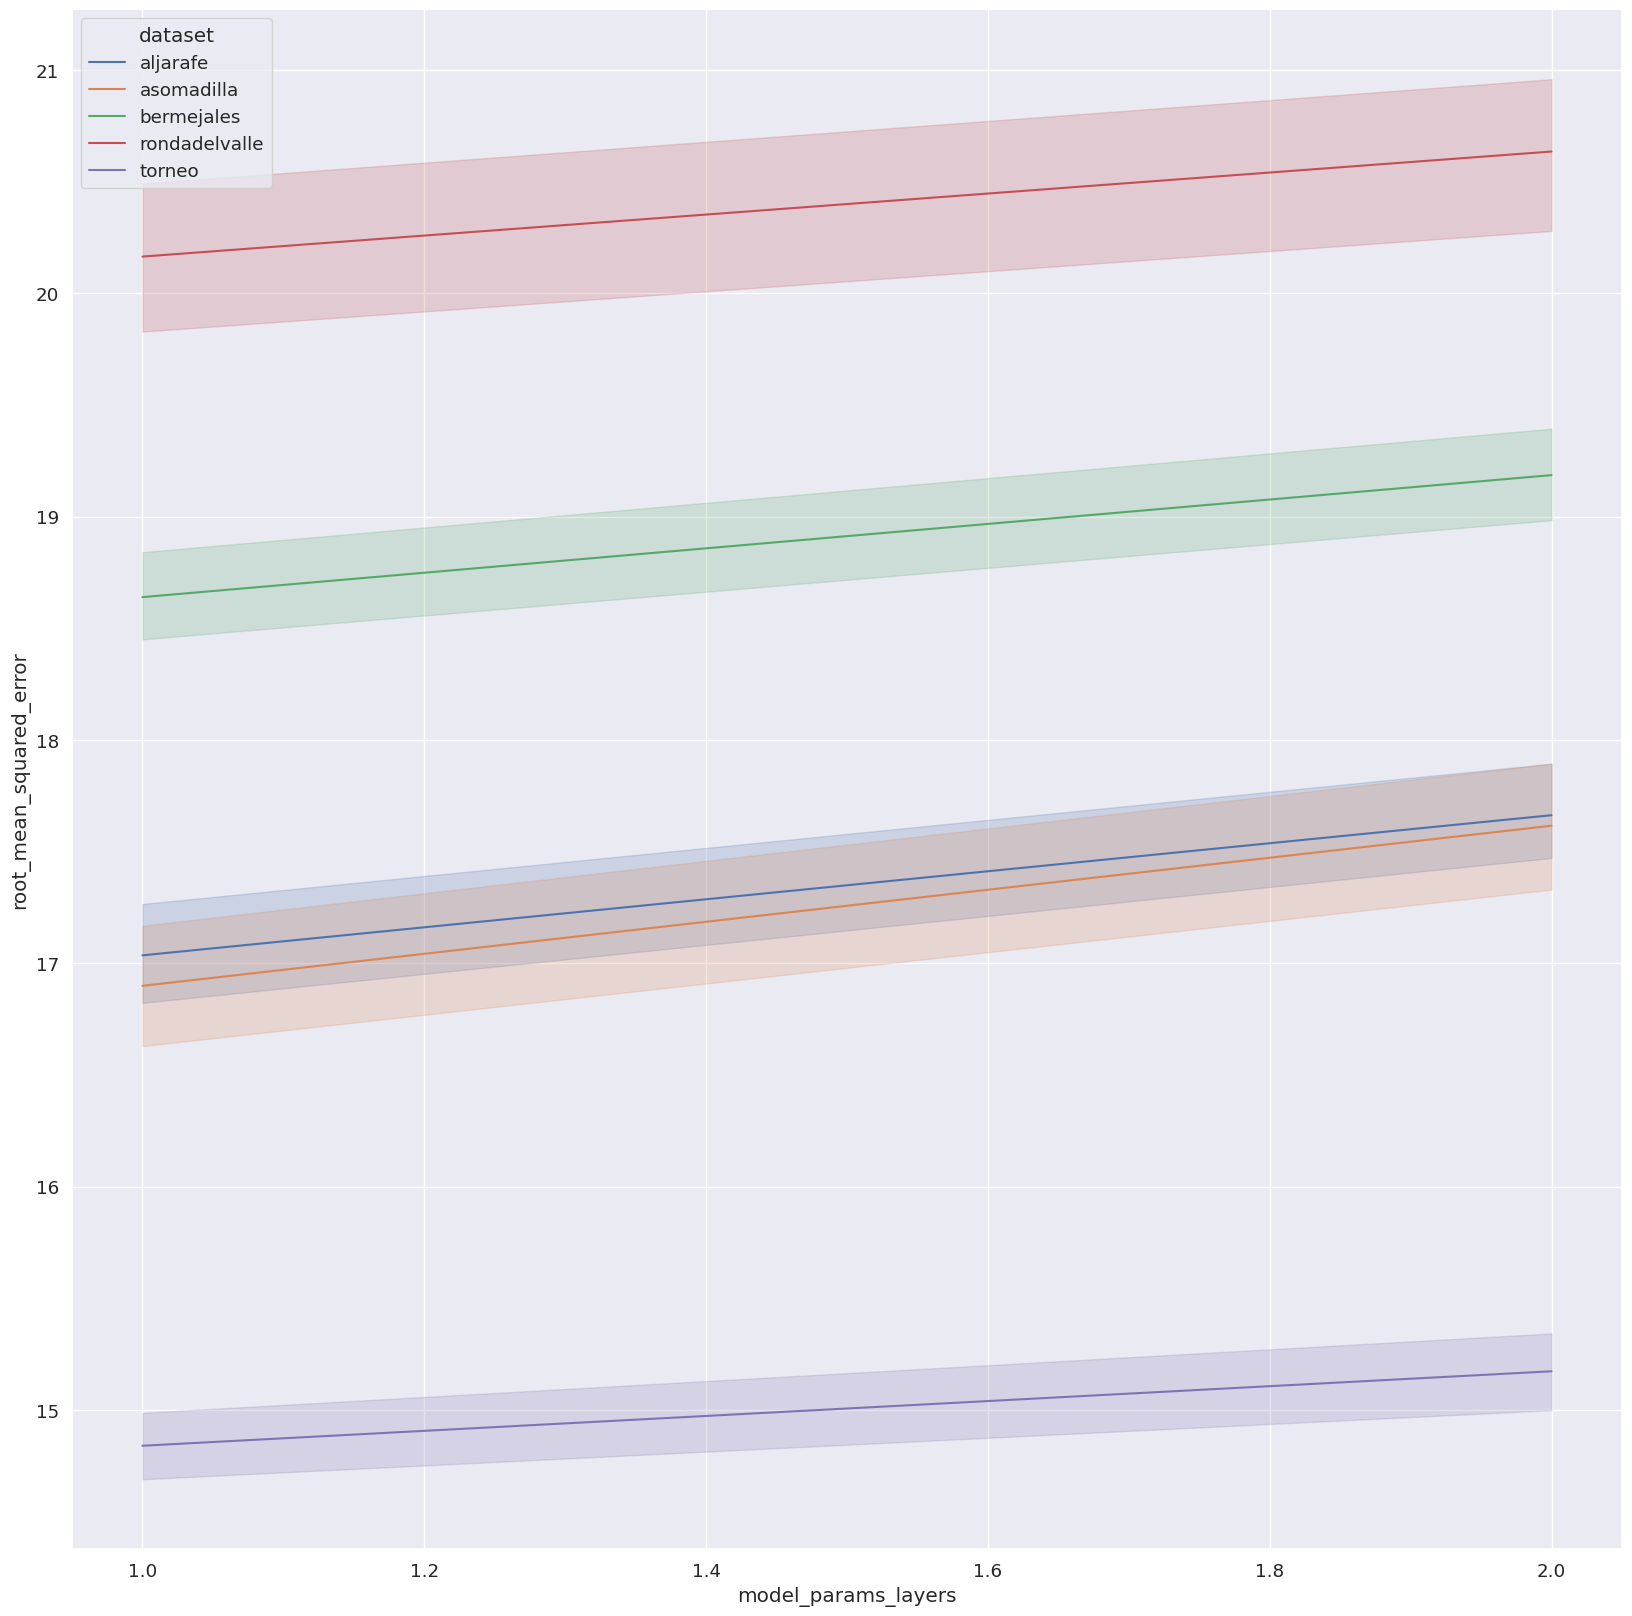

In [221]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))

#g = sns.FacetGrid(df, col="dataset", hue="Condition", col_wrap=5)
sns.lineplot(data=total_metrics[total_metrics.model_name=='TSL'], x="model_params_layers",y="root_mean_squared_error", hue="dataset")
plt.show()

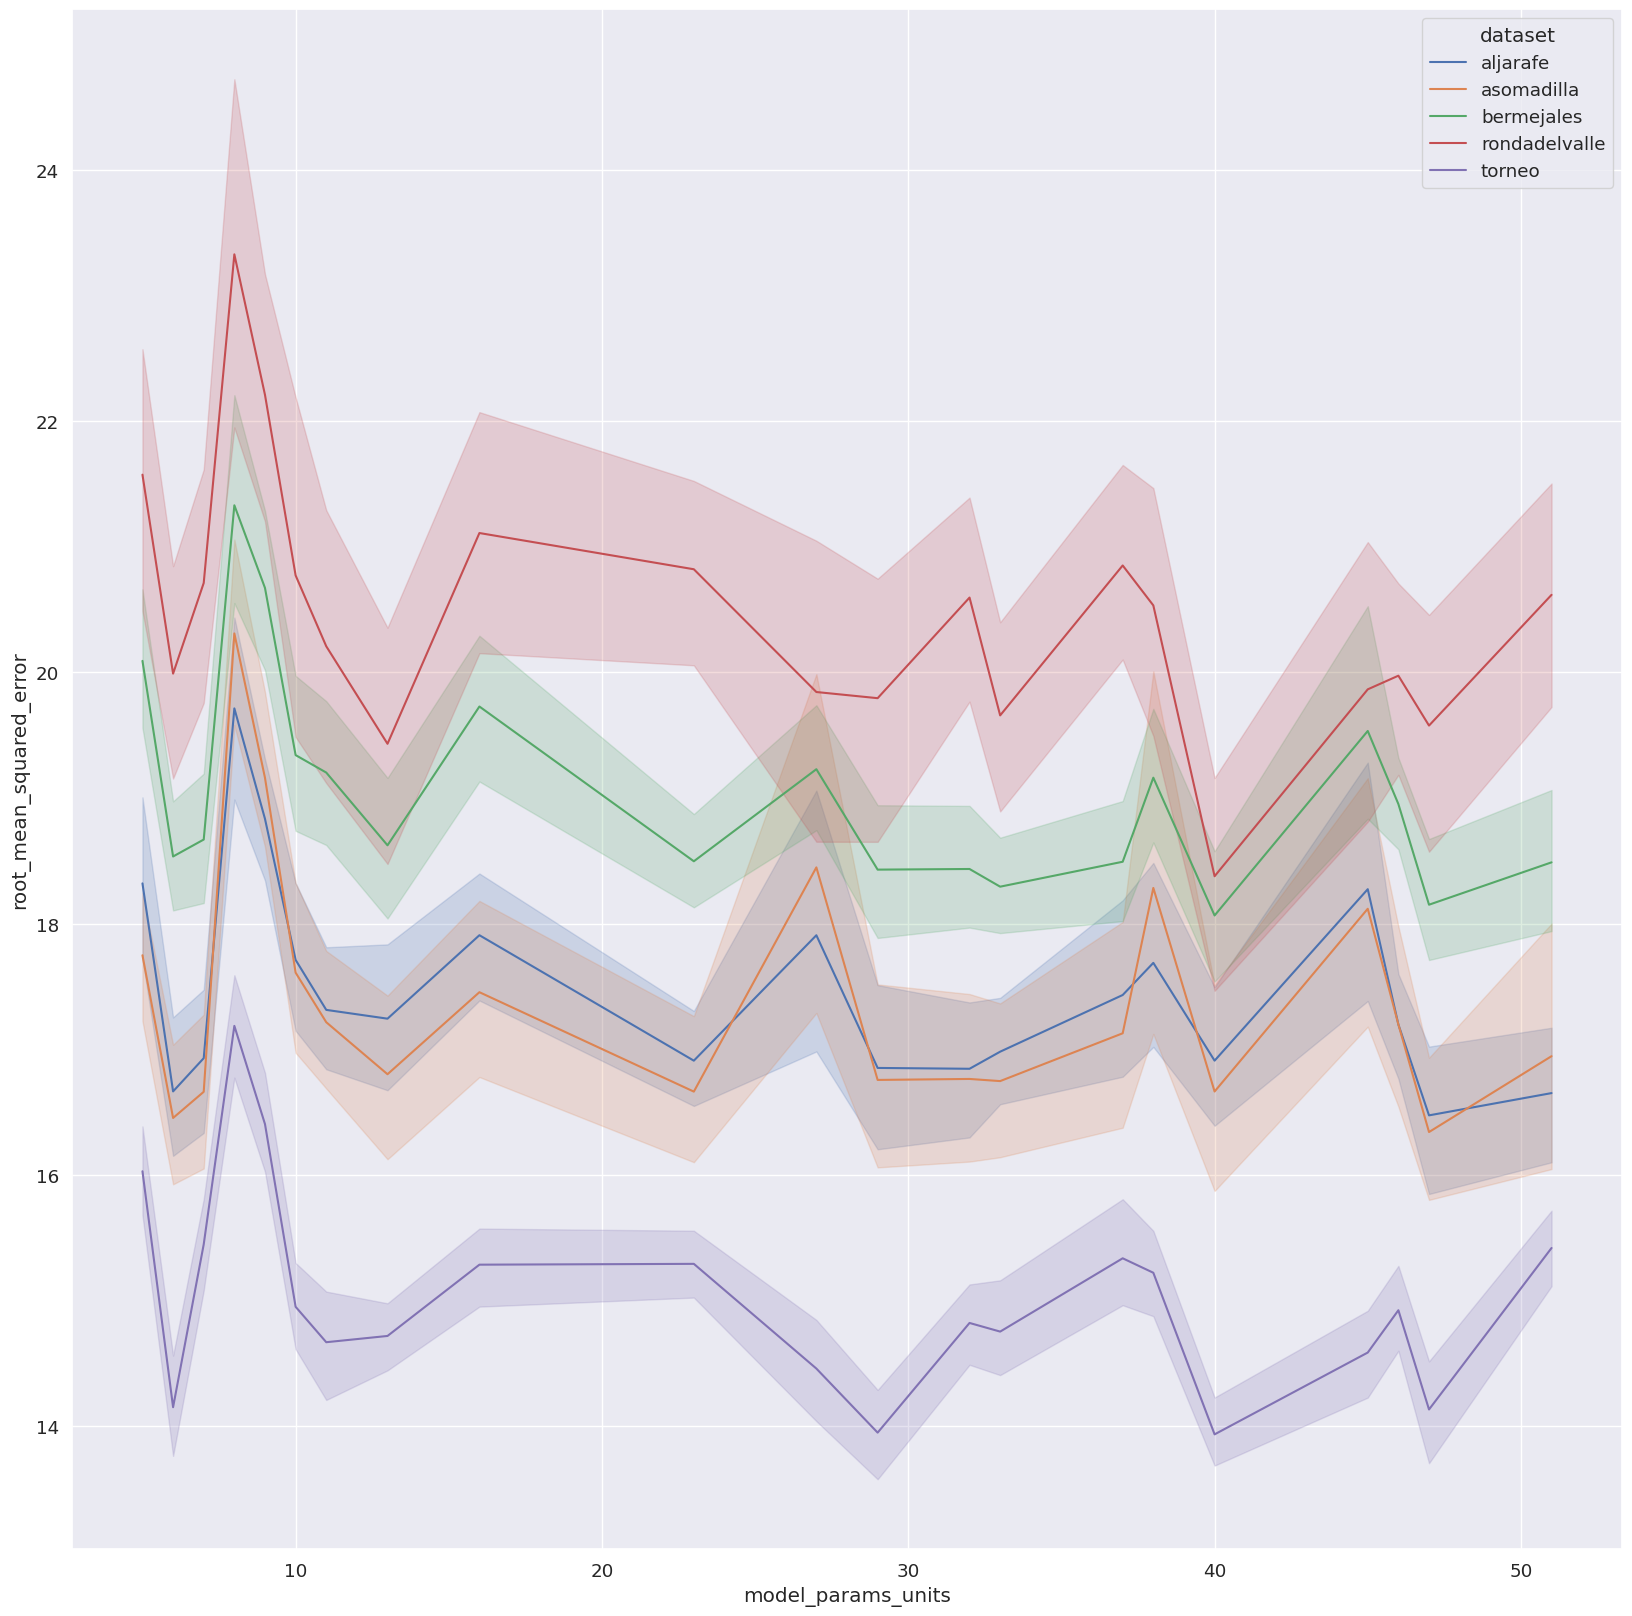

In [222]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,20))

sns.lineplot(data=total_metrics[total_metrics.model_name=='TSL'], x="model_params_units",y="root_mean_squared_error", hue="dataset")
plt.show()

In [6]:
#total_metrics_indexed['model_selection'] = (total_metrics_indexed.reset_index().model_name #+ '_' + total_metrics_indexed.reset_index().selection_name + '_' + total_metrics_indexed.reset_index().selection_params_residual.astype(str)).values

best_metrics = total_metrics_indexed.loc[best_index].reset_index()
best_metrics = best_metrics.groupby(['dataset', 'model_name', 'dataset_params_test_year'], dropna=False).mean().reset_index()
best_metrics = best_metrics.rename({'dataset_params_test_year': 'year'}, axis=1)
best_metrics = best_metrics[(best_metrics.year>2005)&(best_metrics.model_name!='TSLRes')]
best_metrics.pivot(index = ['year'], columns=[ 'dataset','model_name'], values='root_mean_squared_error').round(1)#.to_latex()

/tmp/ipykernel_92963/2099734244.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_metrics = best_metrics.groupby(['dataset', 'model_name', 'dataset_params_test_year'], dropna=False).mean().reset_index()


dataset    Ronda del valle                   Torneo                  
model_name              DT    FF    L1   TSL     DT    FF    L1   TSL
year                                                                 
2006                  21.2  20.3  20.1  19.8   14.3  13.9  13.1  13.5
2007                  19.7  19.5  19.5  20.1   14.2  13.9  13.2  13.5
2008                  20.6  20.6  20.5  20.3   14.4  14.2  13.5  13.8
2009                  20.0  19.1  18.9  19.2   14.7  14.5  13.6  14.1
2010                  21.5  20.3  21.1  19.5   14.7  15.0  14.4  15.3
2011                  18.6  19.1  18.4  18.5   14.7  14.5  14.2  14.3
2012                  16.8  16.8  16.0  16.0   15.3  14.8  14.4  14.6
2013                  18.3  17.2  17.4  16.8   15.0  14.4  13.6  14.7
2014                  18.7  17.7  17.9  18.4   14.5  14.4  13.9  14.3
2015                  17.9  17.5  17.6  17.6   15.2  14.6  14.4  14.2

In [367]:
best_hyperparameters = best_index.to_frame()[best_index.to_frame().model_name!='TSLRes'][['dataset', 'model_name']].reset_index(drop=True)

In [368]:
seq_lens = total_metrics_indexed.loc[best_index.to_frame()[best_index.to_frame().model_name!='TSLRes'].index].reset_index().groupby(['dataset', 'model_name']).head(1)['dataset_params_seq_len'].reset_index(drop=True)

In [371]:
pd.set_option('display.max_colwidth', 2000)
params = list(map(lambda my_dict: {k: round(my_dict[k],4) for k in my_dict if not isnan(my_dict[k])},best_index.to_frame()[best_index.to_frame().model_name!='TSLRes'].loc[:, ['model_params_layers', 'model_params_units', 'model_params_dropout', 'model_params_max_depth', 'model_params_regularization', 'selection_params_regularization']].to_dict('records')))
best_hyperparameters['window'] = seq_lens
best_hyperparameters['params'] = params

best_hyperparameters.set_index(['dataset', 'model_name']).to_latex('tab.tex')

/tmp/ipykernel_3659616/1668513255.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_hyperparameters.set_index(['dataset', 'model_name']).to_latex('tab.tex')


## Sacar gráficas por días de año
## Sacar mejor/peor predicción

# Más resistencia a hiper y roustez
# Flexibilidad a la hora de escoger hiperparámetros
# Mejores resultados en general
# Menor varianza de resultados